In [1]:
import xarray as xr
import pandas as pd
import numpy as np

In [7]:
Temp_22 = xr.open_dataset(r"C:\Users\Xps\Downloads\temp22\Temp22.nc").rename({"valid_time": "time"})
Temp_23 = xr.open_dataset(r"C:\Users\Xps\Downloads\temp23\Temp23.nc").rename({"valid_time": "time"})
Temp_24 = xr.open_dataset(r"C:\Users\Xps\Downloads\temp24\Temp24.nc").rename({"valid_time": "time"})

In [11]:
combined_temp = xr.concat([Temp_22, Temp_23, Temp_24], dim="time")

In [12]:
combined_temp["t2m"] = combined_temp["t2m"] - 273.15

In [14]:
# Load the Rainfall.nc file
rain_ds = xr.open_dataset(r"C:\Users\Xps\Downloads\Rainfall.nc")

# Extract for each city
rain_accra = rain_ds.sel(latitude=5.56, longitude=-0.20, method="nearest")["rainfall"]
rain_kumasi = rain_ds.sel(latitude=6.69, longitude=-1.57, method="nearest")["rainfall"]
rain_tamale = rain_ds.sel(latitude=9.40, longitude=-0.84, method="nearest")["rainfall"]

# Preview a few values
print(rain_accra.isel(time=slice(0, 5)))

<xarray.DataArray 'rainfall' (time: 5)>
[5 values with dtype=float64]
Coordinates:
  * time       (time) datetime64[ns] 2022-01-01 ... 2022-01-01T04:00:00
    latitude   float64 5.5
    longitude  float64 -0.25
Attributes:
    units:        mm/hr
    description:  Simulated hourly rainfall


In [17]:
temp_accra = combined_temp.sel(latitude=5.56, longitude=-0.20, method="nearest")["t2m"]
temp_kumasi = combined_temp.sel(latitude=6.69, longitude=-1.57, method="nearest")["t2m"]
temp_tamale = combined_temp.sel(latitude=9.40, longitude=-0.84, method="nearest")["t2m"]

In [25]:
monthly_rain_accra = rain_accra.resample(time="M").sum()
monthly_rain_kumasi = rain_kumasi.resample(time="M").sum()
monthly_rain_tamale = rain_tamale.resample(time="M").sum()

C:\Users\Xps\anaconda3\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(
C:\Users\Xps\anaconda3\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(
C:\Users\Xps\anaconda3\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


In [26]:
monthly_temp_accra = temp_accra.resample(time="M").mean()
monthly_temp_kumasi = temp_kumasi.resample(time="M").mean()
monthly_temp_tamale = temp_tamale.resample(time="M").mean()

C:\Users\Xps\anaconda3\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(
C:\Users\Xps\anaconda3\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(
C:\Users\Xps\anaconda3\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


In [27]:
monthly_rain_tamale

<xarray.DataArray 'rainfall' (time: 36)>
array([ 746.85693051,  662.30812725, 2617.35046557, 2551.59744776,
       7508.90409646, 7058.68772799, 7503.88464992, 7338.61908511,
       7173.94794475, 2616.57762365, 2459.29435635,  764.48867392,
        736.34976386,  682.77006366, 2645.46785718, 2541.81951731,
       7490.62344215, 7202.0700144 , 7485.85947075, 7489.24425604,
       7090.18490654, 2584.32971448, 2615.44654458,  750.94816786,
        727.60090609,  684.07159012, 2593.42669599, 2531.99544838,
       7461.62869663, 7253.0030421 , 7445.23684007, 7615.77557971,
       7202.35952975, 2571.94152283, 2480.87053906,  761.04384604])
Coordinates:
    latitude   float64 9.5
    longitude  float64 -0.75
  * time       (time) datetime64[ns] 2022-01-31 2022-02-28 ... 2024-12-31
Attributes:
    units:        mm/hr
    description:  Simulated hourly rainfall

In [29]:
total_accra = pd.DataFrame({
    "rainfall": monthly_rain_accra.values,
    "temperature": monthly_temp_accra.values
}, index=monthly_rain_accra.time.values)

In [30]:
total_kuamsi = pd.DataFrame({
    "rainfall": monthly_rain_kumasi.values,
    "temperature": monthly_temp_kumasi.values
}, index=monthly_rain_kumasi.time.values)

In [31]:
total_tamale = pd.DataFrame({
    "rainfall": monthly_rain_tamale.values,
    "temperature": monthly_temp_tamale.values
}, monthly_rain_tamale.time.values)

In [32]:
total_accra.corr()

,rainfall,temperature
rainfall,1.000000,-0.660955
temperature,-0.660955,1.000000


In [33]:
total_kuamsi.corr()

,rainfall,temperature
rainfall,1.000000,-0.712419
temperature,-0.712419,1.000000


In [34]:
total_tamale.corr()

,rainfall,temperature
rainfall,1.000000,-0.328742
temperature,-0.328742,1.000000


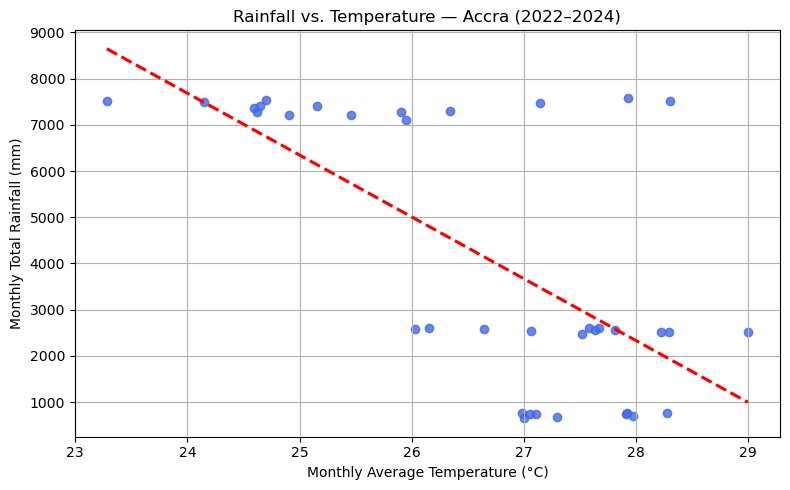

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot with trendline
plt.figure(figsize=(8, 5))
sns.regplot(
    x=total_accra["temperature"],
    y=total_accra["rainfall"],
    ci=None,               # No confidence interval shading
    scatter_kws={"color": "royalblue"},
    line_kws={"color": "red", "linestyle": "--"}
)

# Add titles and labels
plt.title("Rainfall vs. Temperature — Accra (2022–2024)")
plt.xlabel("Monthly Average Temperature (°C)")
plt.ylabel("Monthly Total Rainfall (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()

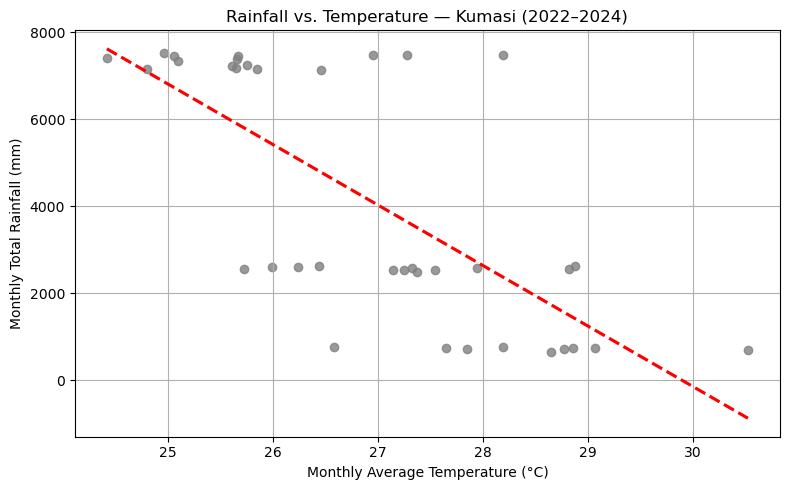

In [41]:
plt.figure(figsize=(8, 5))
sns.regplot(
    x=total_kuamsi["temperature"],
    y=total_kuamsi["rainfall"],
    ci=None,               # No confidence interval shading
    scatter_kws={"color": "grey"},
    line_kws={"color": "red", "linestyle": "--"}
)

# Add titles and labels
plt.title("Rainfall vs. Temperature — Kumasi (2022–2024)")
plt.xlabel("Monthly Average Temperature (°C)")
plt.ylabel("Monthly Total Rainfall (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()

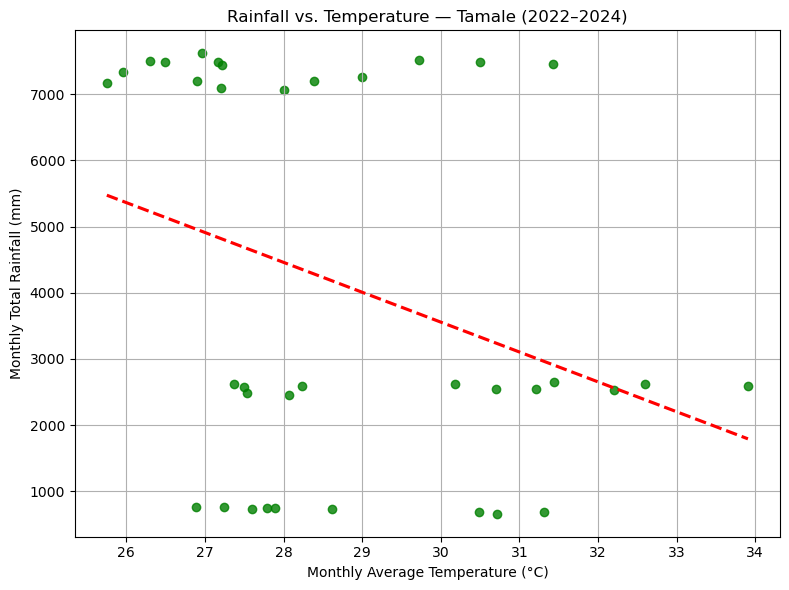

In [39]:
plt.figure(figsize=(8, 6))
sns.regplot(
    x=total_tamale["temperature"],
    y=total_tamale["rainfall"],
    ci=None,
    scatter_kws={"color": "green"},
    line_kws={"color": "red", "linestyle": "--"}
)
plt.title("Rainfall vs. Temperature — Tamale (2022–2024)")
plt.xlabel("Monthly Average Temperature (°C)")
plt.ylabel("Monthly Total Rainfall (mm)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [42]:
monthly_rain = rain_ds.resample(time="M").sum()

C:\Users\Xps\anaconda3\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


In [43]:
monthly_temp = combined_temp.resample(time="M").mean()

C:\Users\Xps\anaconda3\Lib\site-packages\xarray\core\groupby.py:508: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  index_grouper = pd.Grouper(


In [45]:
# Convert xarray DataArrays to NumPy arrays
rain_data = monthly_rain["rainfall"].values
temp_data = monthly_temp["t2m"].values

# Then continue:
time_len, n_lat, n_lon = rain_data.shape
      # shape: (time, lat, lon)

# Dimensions
time_len, n_lat, n_lon = rain_data.shape

# Initialize empty 2D array to hold correlations
corr_map = np.full((n_lat, n_lon), np.nan)

# Loop over grid
for i in range(n_lat):
    for j in range(n_lon):
        rain_series = rain_data[:, i, j]
        temp_series = temp_data[:, i, j]

        if not (np.isnan(rain_series).any() or np.isnan(temp_series).any()):
            corr_map[i, j] = np.corrcoef(rain_series, temp_series)[0, 1]

C:\Users\Xps\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\Xps\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_lakes.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
C:\Users\Xps\anaconda3\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/10m_physical/ne_10m_rivers_lake_centerlines.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


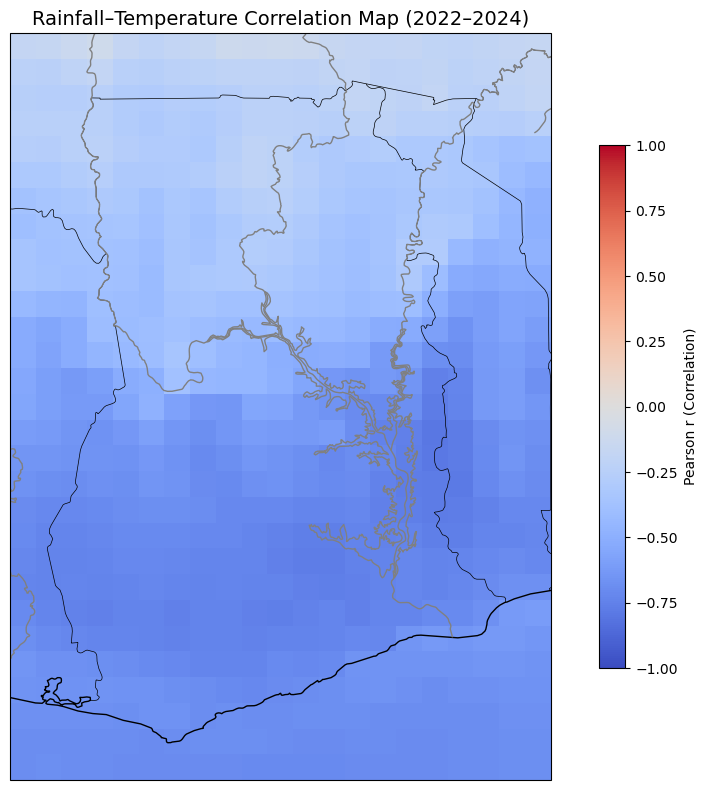

In [46]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

# Extract lat/lon values
lats = monthly_rain["latitude"].values
lons = monthly_rain["longitude"].values

# Create meshgrid for plotting
lon2d, lat2d = np.meshgrid(lons, lats)

# Set up the figure
plt.figure(figsize=(10, 8))
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot the correlation map
c = ax.pcolormesh(lon2d, lat2d, corr_map,
                  cmap="coolwarm", vmin=-1, vmax=1, shading="auto")

# Add geographic features
ax.coastlines()
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, edgecolor='black', facecolor='none')
ax.add_feature(cfeature.LAKES, edgecolor='gray', facecolor='none')
ax.add_feature(cfeature.RIVERS, edgecolor='gray')

# Add colorbar
cb = plt.colorbar(c, ax=ax, orientation='vertical', shrink=0.7, label='Pearson r (Correlation)')

# Title and layout
ax.set_title("Rainfall–Temperature Correlation Map (2022–2024)", fontsize=14)
plt.tight_layout()
plt.show()